In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import drive
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
#load dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/car_price_dataset.csv')

#cek 5 baris pertama
print(df.head())

        Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automatic   231440   
3        Audi      Q5  2023          2.0  Electric          Manual   160971   
4  Volkswagen    Golf  2003          2.6    Hybrid  Semi-Automatic   286618   

   Doors  Owner_Count  Price  
0      3            5   8501  
1      2            3  12092  
2      4            2  11171  
3      2            1  11780  
4      3            3   2867  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB
None
               Year   Engine_Size        Mileage         Doors   Owner_Count  \
count  10000.000000  10000.000000   10000.000000  10000.000000  10000.000000   
mean    2011.543700      3.000560  149239.111800      3.497100      2.991100   
std        6.897699      1.149324   86322.348957      1.110097     

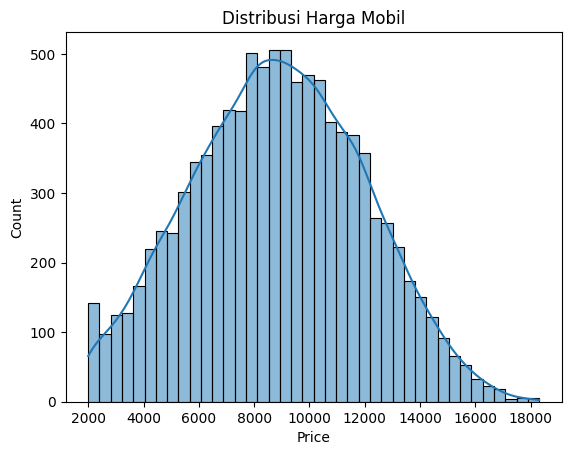

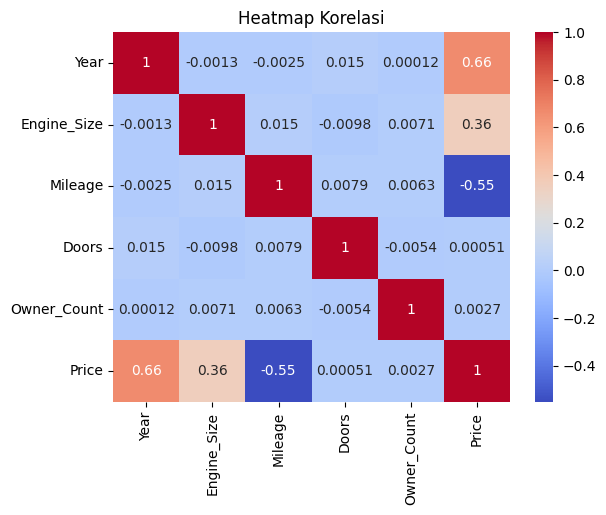

In [13]:
# Cek informasi dataset
print(df.info())

# Cek statistik deskriptif
print(df.describe())

# Cek missing values
print(df.isnull().sum())

# Visualisasi distribusi harga
sns.histplot(df['Price'], kde=True)
plt.title('Distribusi Harga Mobil')
plt.show()

# Korelasi antar fitur
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=np.number)
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

In [14]:
# Handle missing values
df = df.dropna()

# Konversi data kategorikal ke numerik
df = pd.get_dummies(df, columns=['Brand', 'Model', 'Fuel_Type', 'Transmission'], drop_first=True)

# Cek dataset setelah cleaning
print(df.head())

   Year  Engine_Size  Mileage  Doors  Owner_Count  Price  Brand_BMW  \
0  2020          4.2   289944      3            5   8501      False   
1  2012          2.0     5356      2            3  12092      False   
2  2020          4.2   231440      4            2  11171      False   
3  2023          2.0   160971      2            1  11780      False   
4  2003          2.6   286618      3            3   2867      False   

   Brand_Chevrolet  Brand_Ford  Brand_Honda  ...  Model_Sonata  \
0            False       False        False  ...         False   
1             True       False        False  ...         False   
2            False       False        False  ...         False   
3            False       False        False  ...         False   
4            False       False        False  ...         False   

   Model_Sportage  Model_Tiguan  Model_Tucson  Model_X5  Fuel_Type_Electric  \
0           False         False         False     False               False   
1           False 

In [15]:
df['Age'] = 2023 - df['Year']

# Hapus kolom yang tidak diperlukan
df = df.drop(['Year'], axis=1)

# Cek dataset setelah feature engineering
print(df.head())

   Engine_Size  Mileage  Doors  Owner_Count  Price  Brand_BMW  \
0          4.2   289944      3            5   8501      False   
1          2.0     5356      2            3  12092      False   
2          4.2   231440      4            2  11171      False   
3          2.0   160971      2            1  11780      False   
4          2.6   286618      3            3   2867      False   

   Brand_Chevrolet  Brand_Ford  Brand_Honda  Brand_Hyundai  ...  \
0            False       False        False          False  ...   
1             True       False        False          False  ...   
2            False       False        False          False  ...   
3            False       False        False          False  ...   
4            False       False        False          False  ...   

   Model_Sportage  Model_Tiguan  Model_Tucson  Model_X5  Fuel_Type_Electric  \
0           False         False         False     False               False   
1           False         False         False   

In [16]:
# Pisahkan fitur (X) dan target (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print(f'Ridge Regression R² Score: {ridge_r2:.4f}')
print(f'Ridge Regression MSE: {ridge_mse:.2f}')

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print(f'Lasso Regression R² Score: {lasso_r2:.4f}')
print(f'Lasso Regression MSE: {lasso_mse:.2f}')

Ridge Regression R² Score: 0.9995
Ridge Regression MSE: 4219.86
Lasso Regression R² Score: 0.9995
Lasso Regression MSE: 4191.53


In [30]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Linear Regression MSE: {mse:.4f}')
print(f'Linear Regression R2 Score: {r2:.4f}')

Linear Regression MSE: 4213.9225
Linear Regression R2 Score: 0.9995


In [28]:
# Definisi parameter yang mau diuji
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV buat cari parameter terbaik
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,  # Cross-validation 5-fold
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Model terbaik
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

best_rf_mse = mean_squared_error(y_test, y_pred_best_rf)
best_rf_r2 = r2_score(y_test, y_pred_best_rf)

print(f'Best Random Forest R² Score: {best_rf_r2:.4f}')
print(f'Best Random Forest MSE: {best_rf_mse:.2f}')
print(f'Best Parameters: {grid_search.best_params_}')


Best Random Forest R² Score: 0.9708
Best Random Forest MSE: 268439.56
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [29]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training model
rf_model.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf_model.predict(X_test)

# Evaluasi model
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f'Random Forest R² Score: {rf_r2:.4f}')
print(f'Random Forest MSE: {rf_mse:.2f}')

Random Forest R² Score: 0.9679
Random Forest MSE: 294827.40


In [33]:
# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting R² Score: {gb_r2:.4f}')
print(f'Gradient Boosting MSE: {gb_mse:.2f}')

# XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)

print(f'XGBoost R² Score: {xgb_r2:.4f}')
print(f'XGBoost MSE: {xgb_mse:.2f}')

Gradient Boosting R² Score: 0.9945
Gradient Boosting MSE: 50929.67
XGBoost R² Score: 0.9958
XGBoost MSE: 38920.41


In [40]:
# Definisi parameter yang mau dicoba
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# RandomizedSearchCV buat tuning XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_dist, n_iter=20,
    scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1
)

random_search.fit(X_train, y_train)

# Model terbaik
best_xgb = random_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)

best_xgb_mse = mean_squared_error(y_test, y_pred_best_xgb)
best_xgb_r2 = r2_score(y_test, y_pred_best_xgb)

print(f'Best XGBoost R² Score: {best_xgb_r2:.4f}')
print(f'Best XGBoost MSE: {best_xgb_mse:.2f}')
print(f'Best Parameters: {random_search.best_params_}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best XGBoost R² Score: 0.9970
Best XGBoost MSE: 27948.18
Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


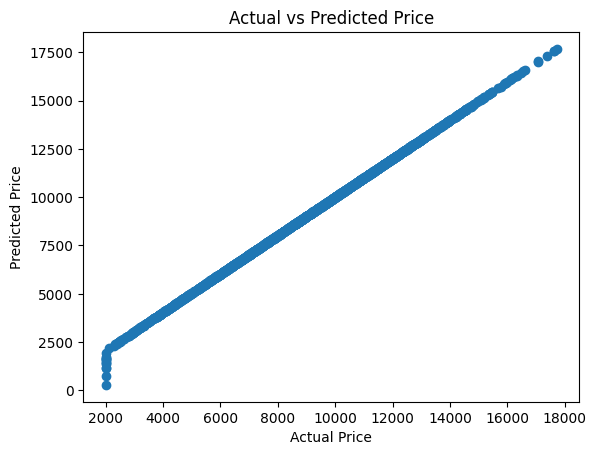

In [41]:
# Plot prediksi vs aktual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()